In [6]:
import numpy as np

In [7]:
def GetProjectivePoint_2D(point, line):
    a = point[0]
    b = point[2]
    k = line[0]
    t = line[1]
    if k == 0:
        return [a, t]
    elif k == np.inf:
        return [0, b]
    
    x = (a+k*b-k*t) / (k*k+1)
    y = k*x + t
    return [x,y]

In [8]:
from _operator import inv
import matplotlib.pyplot as plt

In [19]:
data_file = open('waterlemon_3a.csv')

In [20]:
dataset= np.loadtxt(data_file, delimiter=",")

In [39]:
X = dataset[:,1:3]
y = dataset[:,3]

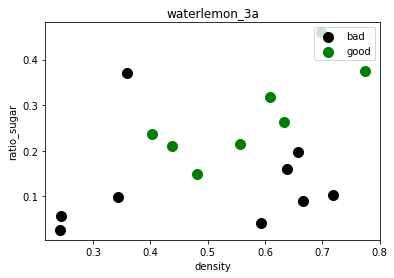

In [42]:
f1 = plt.figure(1)
plt.title('waterlemon_3a')
plt.xlabel('density')
plt.ylabel('ratio_sugar')
plt.scatter(X[y == 0,0], X[y == 0,1], marker ='o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker ='o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper right')
plt.show()

In [49]:
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [52]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.5, random_state=0)

In [54]:
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)

In [56]:
y_pred = lda_model.predict(X_test)

In [58]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[4 1]
 [1 3]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



In [ ]:
f2 = plt.figure(2)
h = 0.001
